In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.drop(columns=['CustomerID', 'Gender'], axis=1, inplace=True)
df = df.rename(columns={'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
df.head(3)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6


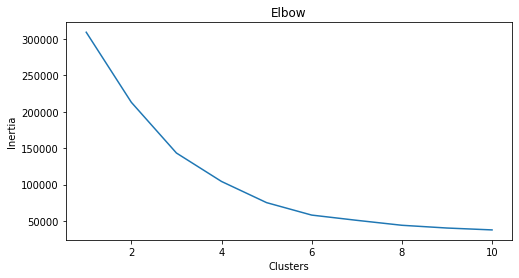

In [4]:
X = df
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

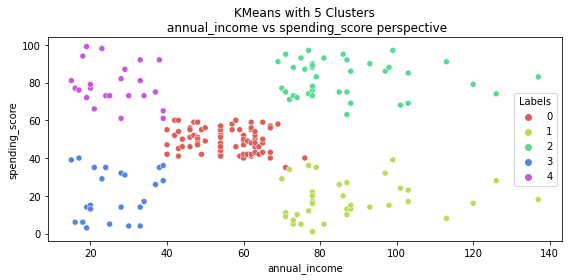

In [5]:
# 5-Means Clustering
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_

# annual_income vs spending_score clusters plot
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters\n annual_income vs spending_score perspective')
plt.tight_layout()
plt.show()

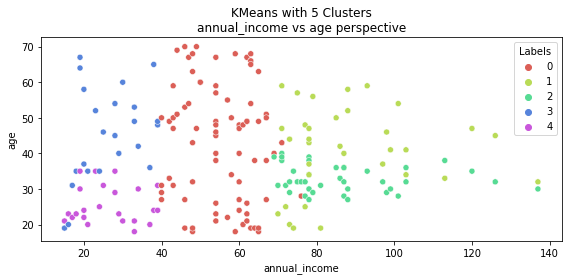

In [6]:
# annual_income vs age clusters plot
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['age'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters\nannual_income vs age perspective')
plt.tight_layout()
plt.show()

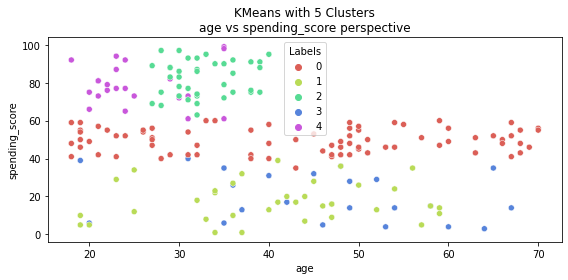

In [7]:
# age vs spending_score clusters plot
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['age'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters\nage vs spending_score perspective')
plt.tight_layout()
plt.show()